In [1]:
import scipy
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Пример: cредний вес детей при рождении. Средний вес детей при рождении составляет 3300 г.
В то же время, если мать ребёнка живёт за чертой бедности, то средний вес таких детей — 2800 г.
С целью увеличить вес тех детей, чьи матери живут за чертой бедности, разработана экспериментальная 
программа ведения беременности. Чтобы проверить ее эффективность, проводится эксперимент. В нем
принимают участие 25 женщин, живущих за чертой бедности. У всех них рождаются дети, и их средний вес
составляет 3075 г.
С использованием описанных критериев можно математически сформулировать задачу оценки эффективности 
экспериментальной программы.
Выдвигается нулевая гипотеза о том, что программа неэффективна:
H0 : mu = 2800
то есть средний вес детей, прошедших экспериментальную программу, такой же, как и в целом у детей, 
живущих за чертой бедности. Эту нулевую гипотезу необходимо проверить против двусторонней альтернативы
(программа как-то влияет на вес детей):
H0 : mu<> 2800

In [100]:
x=3075
sigma=500
mu0=2800
n=25
alpha=0.05

In [101]:
t=stats.t.ppf(1-(alpha/2), n-1)
t

2.0638985616280205

In [110]:
print(x-t*(sigma/np.sqrt(n)),x+t*(sigma/np.sqrt(n)))
print((x - mu0)-t*(sigma/np.sqrt(n)),(x - mu0)+t*(sigma/np.sqrt(n)))

2868.61014384 3281.38985616
68.6101438372 481.389856163


In [104]:
z = (x - mu0)/(sigma/np.sqrt(n))

In [108]:
print('p-value: ', 2 * (1 - scipy.stats.t.cdf(z,n-1)))

p-value:  0.0111478298127


In [ ]:
Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное 
отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения
беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень 
кальция в этой популяции отличается от 9.5?Посчитайте достигаемый уровень значимости.

In [124]:
x=9.5
sigma=0.4
n=160
x_mean=9.57

In [125]:
z=(x_mean-x)/(sigma/np.sqrt(n))

In [126]:
print(x-z*sigma/np.sqrt(n),x+z*sigma/np.sqrt(n))

9.43 9.57


In [133]:
print('p-value: ',2*(1-stats.norm.cdf(abs(z))))

p-value:  0.0268566955075


Имеются данные о стоимости и размерах 53940 бриллиантов.
Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split 
(зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:
линейную регрессию с помощью LinearRegression без параметров
случайный лес с помощью RandomForestRegressor с random_state=1.
Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули 
отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите 
достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы 
на уровне значимости α=0.05?

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

C:\Users\aguka\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
df=pd.read_csv('C:\Study\Statistics\Week2\diamonds.txt',sep='\t')

In [5]:
df_x=df[['carat','depth','table','x','y','z']]
df_y=df['price']

In [6]:
X_train, X_test, y_train, y_test=train_test_split(df_x.values, df_y.values, test_size=0.25,random_state=1)

In [7]:
y_pred_lr=LinearRegression().fit(X_train,y_train).predict(X_test)
y_pred_rf=RandomForestRegressor(random_state=1).fit(X_train, y_train).predict(X_test)

In [22]:
lr=np.abs(y_test-y_pred_lr)
rf=np.abs(y_test-y_pred_rf)
print(np.mean(lr))
print(np.mean(rf))

890.376400429
803.614338308


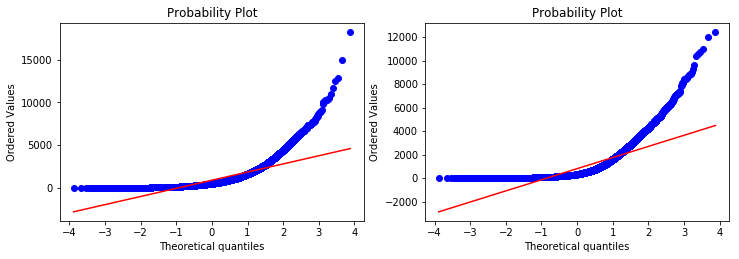

In [200]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(lr, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(rf, dist="norm", plot=pylab)
pylab.show()

In [28]:
n=y_test.shape[0]
t=stats.t.ppf(1-(0.05/2), n-1)
lr_rf=lr-rf
lr_rf_std=np.std(lr_rf,ddof=1)
lr_rf_mean=np.mean(lr_rf)
sigma=lr_rf_std/np.sqrt(n)
print(lr_rf_mean- t*sigma, lr_rf_mean+t*sigma)

73.6100876946 99.9140365463


In [27]:
print ("95%% confidence interval: [%f, %f]" % DescrStatsW(lr_rf).tconfint_mean())

95% confidence interval: [73.610088, 99.914037]


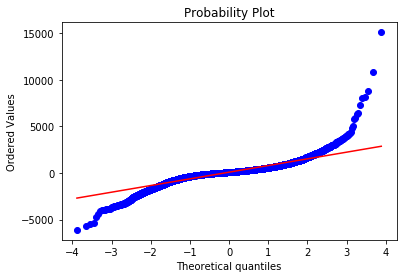

In [10]:
stats.probplot(lr_rf, dist = "norm", plot = pylab)
pylab.show()

В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. 
В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; 
в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.
Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. 
Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о
заразительности зевоты подтверждён.
Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? 
Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после 
десятичной точки.

In [147]:
n1=34
a=10
n2=16
b=4


In [148]:
def proportions_diff_confint_ind(n1, n2, a, b, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(a)/n1
    p2 = float(b)/n2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/n1 + p2 * (1 - p2)/n2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/n1 + p2 * (1 - p2)/n2)
    
    return (left_boundary, right_boundary)

In [149]:
proportions_diff_confint_ind(n1,n2,a,b)

(-0.2175577216559601, 0.30579301577360718)

In [150]:
def proportions_diff_z_stat_ind(n1,n2,a,b):  
    p1 = float(a)/n1
    p2 = float(b)/n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [151]:
proportions_diff_z_stat_ind(n1,n2,a,b)

0.32410186177608225

In [152]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [158]:
print('p-value: %f' % proportions_diff_z_test(proportions_diff_z_stat_ind(n1,n2,a,b), alternative = 'greater'))

p-value: 0.372930


Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. 
Сто из банкнот были настоящими, и сто — поддельными.
Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split 
(зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:
логистическая регрессия по признакам X1,X2,X3;
логистическая регрессия по признакам X4,X5,X6.
Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. 
Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости.

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [176]:
df=pd.read_csv('C:\\Study\\Statistics\\Week2\\banknotes.txt',sep='\t')

In [177]:
X=df[['X1','X2','X3','X4','X5','X6']]
y=df['real']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=50, random_state=1)
y1_pred=LogisticRegression().fit(X_train[['X1','X2','X3']].values, y_train.values).predict(X_test[['X1','X2','X3']].values)
y2_pred=LogisticRegression().fit(X_train[['X4','X5','X6']].values, y_train.values).predict(X_test[['X4','X5','X6']].values)

In [178]:
print(accuracy_score(y_test, y1_pred))
print(accuracy_score(y_test, y2_pred))

0.8
0.98


In [179]:
y1=np.abs(y_test-y1_pred)
y2=np.abs(y_test-y2_pred)

In [180]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [181]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [182]:
proportions_diff_confint_rel(y1, y2, alpha = 0.05)

(0.059945206279614305, 0.30005479372038568)

In [183]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [184]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [185]:
proportions_diff_z_stat_rel(y1, y2)

2.9386041680175268

In [186]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [188]:
proportions_diff_z_test(proportions_diff_z_stat_rel(y1, y2), alternative = 'two-sided')

0.0032969384555543435

Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. 
Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.
Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. 
Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. 
Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков 
после десятичной точки.

In [146]:
x=525
sigma=100
n=100
x_mean=541.5
z=(x-x_mean)/(sigma/np.sqrt(n))
scipy.stats.norm.cdf(z)

0.049471468033648103